In [47]:
from constant import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import time
import cPickle
import argparse
import math
import random
from sklearn.manifold import TSNE
from sklearn import decomposition

#### Parameters ####
model_type_strs = ['crop'] # len = 1
model_names = ['0', 'all'] # len = 2
test_type_strs = ['crop'] # len = 1
test_names = ['40'] # len = 1
####################

plt.rcParams['figure.figsize'] = (15, 15)

class_sum = 100
image_sum_per_class = 1000

sample = random.sample(range(image_sum_per_class), class_sum)

accuracy = {}

for model_type_str in model_type_strs:
    for model_name in model_names:
        for test_type_str in test_type_strs:
            for test_name in test_names:
                config_str = model_type_str + model_name + test_type_str + test_name
                with open('{}img2vec/vectors_{}_{}_{}_{}.pickle'\
                          .format(result_root, model_type_str, model_name, test_type_str, test_name)) as f:
                    vectors = cPickle.load(f)
                    print 'vectors_{}_{}_{}_{}.pickle loaded.'.format(model_type_str, model_name, test_type_str, test_name)
                    
                accuracy[config_str] = np.zeros(class_sum)
                for label in range(class_sum):
                    vec = []
                    accuracy[config_str][label] = 0.0
                    for i in range(len(vectors[label])):
                        vector, predict_id, index_in_lmdb = vectors[label][i]
                        if label == predict_id:
                            accuracy[config_str][label] += 1
                        vec.append(vector)
                    accuracy[config_str][label] /= len(vectors[label])
                    mean = np.mean(vec, axis=0)
                    std = np.std(vec, axis=0)

                    fig = plt.figure()
                    ax = plt.gca()
                    ax.set_xlim([-10, 110])
                    ax.set_ylim([-10, 15])
                    plt.errorbar(range(class_sum), mean, yerr=std, fmt='-o')
                    plt.title('{}_{}_{}_{}_{} accuracy: {}'\
                                .format(label, model_type_str, model_name, test_type_str, test_name, accuracy[config_str][label]))
                    #plt.show()
                    fig.savefig('{}img2vec/plots/{}_{}_{}_{}_{}.png'\
                                .format(result_root, model_type_str, test_type_str, test_name, label, model_name))
                    plt.close()

                    '''
                    X = []
                    c = []
                    for i in range(len(vectors[label])):
                        vector, predict_id, index_in_lmdb = vectors[label][i]
                        X.append(vector)
                        if predict_id == label:
                            c.append((1, 1, 1))
                        else:
                            c.append((0.1, 0.1, 0.1))
                    X = np.array(X)
                    '''


                    '''
                    X_tsne = TSNE().fit_transform(vec)
                    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c = c)
                    plt.show()
                    '''

                    #plt.scatter(X[:, 0], X[:, 1], c=c)
                    #plt.show()

                    '''
                    pca = decomposition.PCA(n_components=2)
                    pca.fit(X)
                    print pca.explained_variance_ratio_
                    X = pca.transform(X)
                    plt.scatter(X[:, 0], X[:, 1], c=c)
                    plt.show()
                    '''

vectors_crop_0_crop_40.pickle loaded.
vectors_crop_all_crop_40.pickle loaded.


[ 45.  64.  78.  89.  87.  90.  51.  44.  73.  86.  96.  46.  63.  66.  98.
  52.  91.  57.  50.  92.  65.  60.  88.  70.  41.  99.  24.  83.  11.   2.
  76.  30.  28.  74.  40.  80.  69.  42.   3.  54.  72.  43.   5.  56.   4.
  31.  68.  15.   0.  95.  71.   1.  97.   9.  93.  14.  59.  58.  47.  84.
  16.  39.  94.  17.  19.  10.  23.  33.  62.  25.  79.  85.  38.  18.  35.
  20.  34.  77.   8.  22.  27.  21.  12.   7.  61.  29.  67.  36.  48.  82.
  81.  53.  32.  13.  75.  37.  49.  26.  55.   6.]


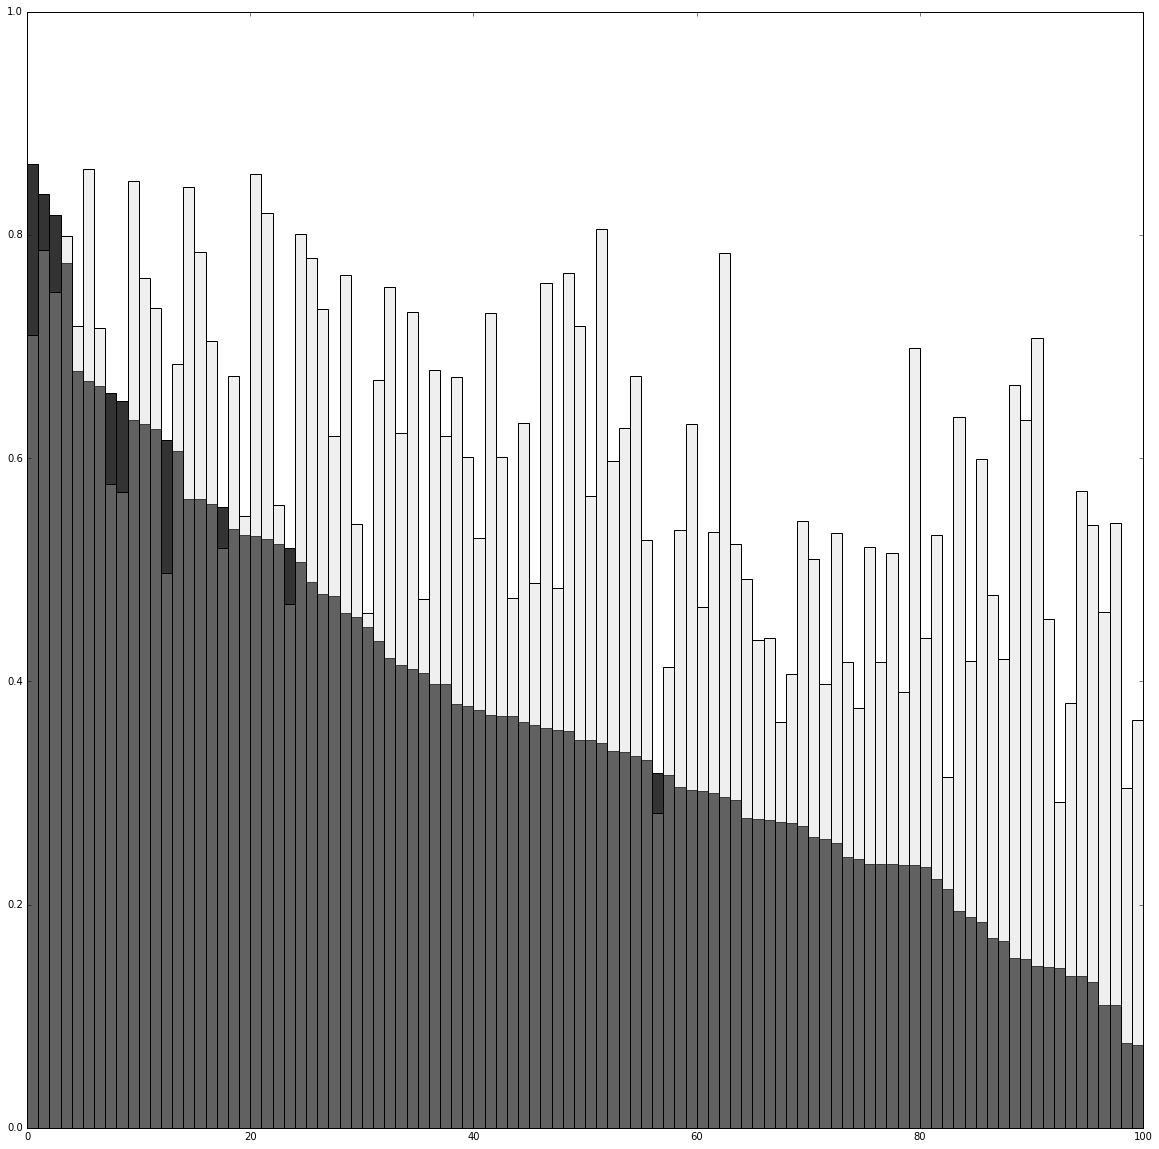

In [48]:

plt.rcParams['figure.figsize'] = (20, 20)

colors = [(0,0,0,0.8), (0.8,0.8,0.8,0.3)]
cc = 0

fig = plt.figure()
ax = plt.gca()
ax.set_xlim([0, 100])
ax.set_ylim([0, 1])
for model_type_str in model_type_strs:
    for test_type_str in test_type_strs:
        for test_name in test_names:
            gap = np.zeros((100, 4))
            for i in range(len(model_names)): # Should be 2.
                config_str = model_type_str + model_names[i] + test_type_str + test_name
                gap[:, i] = accuracy[config_str]
            gap[:, 2] = gap[:, 1] - gap[:, 0]
            gap[:, 3] = range(class_sum)
            gap = np.array(sorted(gap, key = lambda k: k[0], reverse = True))
            print gap[:, 3]
            plt.bar(range(100), gap[:, 0], color = colors[0], width = 1)
            plt.bar(range(100), gap[:, 1], color = colors[1], width = 1)
            #plt.xticks(range(100), gap[:, 3])
            plt.show()
            fig.savefig('{}img2vec/plots/accuracy_sorted_{}_{}_{}_{}.png'\
                        .format(result_root, model_type_str, model_name, test_type_str, test_name))
            plt.clf()